SOURCE https://campus.datacamp.com/courses/introduction-to-network-analysis-in-python

# Network Analysis
Modeling relationship between entities.

#### Examples of Network
- Social Network
    > Modeling relationship between people
- Transportation Network
    > Modeling connectivity between locations, as determined by roads or flight paths connecting them
    
#### Examples of Analysis
- Insights
- Important entities: influencers in social network
- Pathfinding: most efficient transport path
- CLustering: finding communities

#### Network Structure
Graph { (Node)---Edge--(Node) }
- Node
- Edge
- Graph

#### NetworkX API
> https://networkx.org/documentation/stable/tutorial.html

In [1]:
import networkx as nx

In [3]:
# Create an empty graph(network)
G = nx.Graph()

# Add nodes
nodes_list = [1, 2, 3]
G.add_nodes_from(nodes_list)

# Print nodes
G.nodes()

NodeView((1, 2, 3))

In [11]:
# Add edge between nodes
G.add_edge(1, 2)

# Print edges
G.edges()

EdgeView([(1, 2)])

In [7]:
# Add metadata to the node
G.nodes[1]['label'] = 'blue'

# Print nodes with data
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

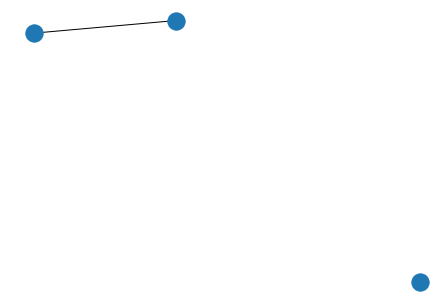

In [13]:
import matplotlib.pyplot as plt

nx.draw(G)
plt.show()

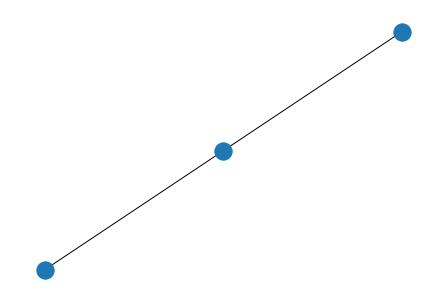

In [15]:
# Add edge between nodes (2,3)
G.add_edge(2, 3)

nx.draw(G)
plt.show()

[`output expression` for `iterator variable` in `iterable` if `predicate expression`]

Sample code from datacamp

```
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]
```

#### Type of Graphs

- Undirected Graphs
    > e.g. Facebook's social graph
    > ()---()
    > edges don't have any inherent directionality associated with them
    > (accepting friend request then connected)
    
    ```
    G = nx.Graph()
    type(G)
    >>> networkx.classes.graph.Grpah
    ```
    

- Directed Graphs
    > e.g. Twitter's social graph
    > ()-->()
    > because of the nature of how users interact with one another
    > (just follow one whether the one follow back or not)
    > an inherent directionality associated with the graph
    
    ```
    D = nx.DiGraph()
    type(D)
    >>> networkx.classes.digraph.DiGraph
    ```
    

- Multi(Di)Grpah
    > e.g. Trip records between bike sharing stations
    > ()≡≡>()
    
    ```
    M = nx.MultiGraph()
    type(M)
    >>> networkx.classes.multigraph.MultiGraph
    ```
    ```
    MD = nx.MultiDiGraph()
    type(MD)
    >>> networkx.classes.multidigraph.MultiDiGraph
    ```

#### Weight on Graphs

- Edges can contain weights
    > collapsing 3 edges into a single one and give them as a weight metadata with the value '3', indicating that it was orginally 3 edges between the pair of nodes

```
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1
```

#### Self-loops
- Nodes that are connected to themselves
    > e.g. in certain scenarios, such as in bike-sharing data, where start and end station are same.

```
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))
```

### Network Visualization

#### Matrix plots
- Undirected graph
- Directed graph: not necessarily to be symmetrical

```
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# import networkx as nx
# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()
```

#### Arc plots
- a transformation of the node-link diagram layout, in which nodes are ordered along one axis of the plot, and edges are drawn using circular arcs from one node to another

```
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
# https://nxviz.readthedocs.io/en/latest/modules.html?highlight=ArcPlot#nxviz.plots.ArcPlot
a2 = ArcPlot(T, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()
```

#### Circos plots
- a transformation of the ArcPlot, such that the two ends of the ArcPlot are joined together into a circle.
- Circos Plots were originally designed for use in genomics, and you can think of them as an aesthetic and compact alternative to Arc Plots.

```
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()
```

### Degree Centrality
- (Number of Neighbors I have) / (Number of Neighbors I Could Possibly Have)
- Examples of node with high degree centrality:
    - Twitter broadcasters(having many followers)
    - Airport transportation hubs
    - Disease super-spreaders

```
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)
```

```
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

# Print the degrees
print(degrees)
```

```
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist([len(list(T.neighbors(n))) for n in T.nodes()])
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter([len(list(T.neighbors(n))) for n in T.nodes()], list(deg_cent.values()))
plt.show()
```

### Pathfinding (or Finding paths)

Pathfinding is important for
- Optimization: e.g. shortest transport paths
- Modeling: e.g. diease spread, information passing

Breadth-First Search (BFS) Algorithm
- e.g. Shortest path between two nodes

```
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of nodes to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
```